In [1]:
%matplotlib inline

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [3]:
# def showImage(img,title = None):
#     plt.figure(figsize = (8,8))
#     plt.title(title)
#     plt.yticks([])
#     plt.xticks([])
#     plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

def showImage(img, title=None):
    plt.figure(figsize=(8,7))
    plt.title(title)
    plt.yticks([])
    plt.xticks([])
    plt.imshow(img,'gray')

In [4]:
# Input Grayscale Image

img = cv2.imread('lcimage.png',0)

In [9]:
# Polynomial chaotic system
def chaos(x0 = 0.2, w0 = 3.57, e0 = 2.1, itr = 50):
    W = [w0]
    E = [e0]

    for i in range(1,9):
        W.append((i+1)*W[0])
    for i in range(1,4):
        E.append(E[0])

    X = [x0]

    for i in range(itr):
        xMul = X[i]*(1-X[i])
        L = [j*xMul for j in E]
        nex = L[0]
        for j in range(1,4):
            for k in range(j+1):
                ind = int(k+(((j-1)*(j+2))/2))
                nex += W[ind]*(L[k]**(j+1-k))
        X.append(nex%1)
    return X

def chaos1(x0 = 0.2, w0 = 3.57, e0 = 2.1, itr = 50):
    W = [w0]
    E = [e0]

    for i in range(1,9):
        W.append((i+1)*W[0])
    for i in range(1,4):
        E.append(E[0])

    W = np.array(W)
    E = np.array(E)

    X = np.zeros(itr+1)
    X[0] = x0
    pow1 = np.array([2,1])
    pow2 = np.array([3,2,1])
    pow3 = np.array([4,3,2,1])
    for i in range(itr):
        L = E*(X[i]*(1-X[i]))
        res = np.hstack((np.power(L[:2], pow1), np.power(L[:3], pow2), np.power(L, pow3)))
        # res = np.power(np.multiply(LL, X[i]*(1-X[i])), powr)
        X[i+1] = np.mod(E[0]*(X[i]*(1-X[i])) + np.dot(res, W), 1)
    return X

def chaos2(x0 = 0.2, w0 = 3.57, e0 = 2.1, itr = 50):
    W = [w0]
    E = [e0]

    for i in range(1,9):
        W.append((i+1)*W[0])
    for i in range(1,4):
        E.append(E[0])

    W = np.array(W)
    E = np.array(E)

    X = np.zeros(itr+1)
    X[0] = x0
    LL = np.hstack((E[:2], E[:3], E))
    powr = np.array([2,1,3,2,1,4,3,2,1])
    for i in range(itr):
        res = np.power(np.multiply(LL, X[i]*(1-X[i])), powr)
        X[i+1] = np.mod(E[0]*(X[i]*(1-X[i])) + np.dot(res, W), 1)
    return X

def chaos3(x0 = 0.2, w0 = 3.57, e0 = 2.1, itr = 50):
    W = [w0]
    E = [e0]

    for i in range(1,9):
        W.append((i+1)*W[0])
    for i in range(1,4):
        E.append(E[0])

    W = np.array(W)
    E = np.array(E)

    X = np.zeros(itr+1)
    X[0] = x0
    for i in range(itr):
        xMul = X[i]*(1-X[i])
        L = np.multiply(E, xMul)
        res = np.ones(9)
        res[0] = L[0]
        res[0:2] = np.multiply(res[:2], L[:2])
        res[2:5] = np.multiply(res[:3], L[:3])
        res[5:] = np.multiply(res[2:6], L)
        X[i+1] = np.mod(E[0]*xMul + np.dot(res, W), 1)
    return X

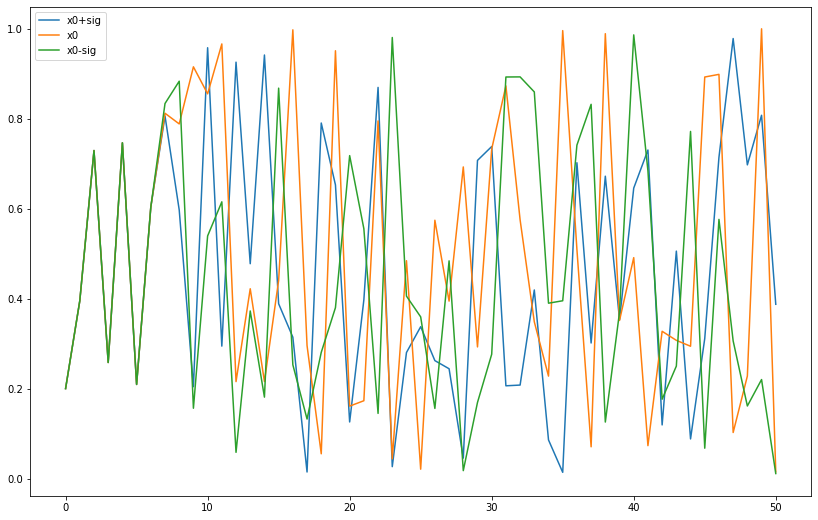

In [10]:
x0,w0,e0,itr = 0.2,3.57,2.1,50
sig = 1e-16
plt.figure(figsize = (14, 9))
plt.plot(range(51),chaos(x0+sig,w0,e0,itr), label = 'x0+sig')
plt.plot(range(51),chaos(x0,w0,e0,itr), label = 'x0')
plt.plot(range(51),chaos(x0-sig,w0,e0,itr), label = 'x0-sig')
plt.legend()

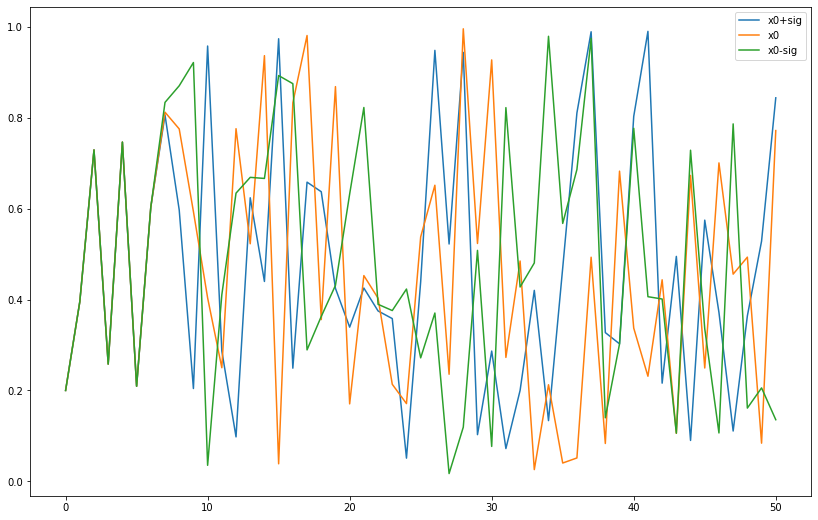

In [15]:
# Testing Chaos

x0,w0,e0,itr = 0.2,3.57,2.1,50
sig = 1e-16
plt.figure(figsize = (14, 9))
plt.plot(range(51),chaos3(x0+sig,w0,e0,itr), label = 'x0+sig')
plt.plot(range(51),chaos3(x0,w0,e0,itr), label = 'x0')
plt.plot(range(51),chaos3(x0-sig,w0,e0,itr), label = 'x0-sig')
plt.legend()

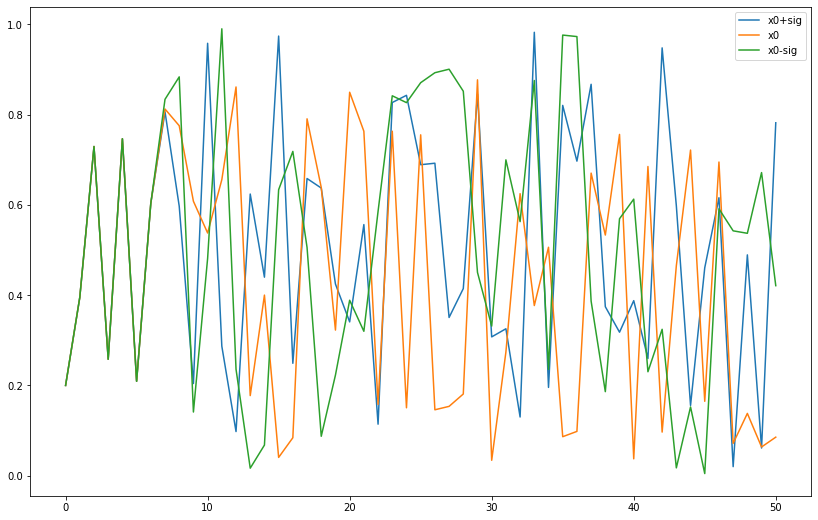

In [12]:
# Testing Chaos

x0,w0,e0,itr = 0.2,3.57,2.1,50
sig = 1e-16
plt.figure(figsize = (14, 9))
plt.plot(range(51),chaos2(x0+sig,w0,e0,itr), label = 'x0+sig')
plt.plot(range(51),chaos2(x0,w0,e0,itr), label = 'x0')
plt.plot(range(51),chaos2(x0-sig,w0,e0,itr), label = 'x0-sig')
plt.legend()

In [7]:
# def iterL4(W,E,c,itr=20):
#     X = [c]
#     for i in range(itr):
#         xMul = X[i]*(1-X[i])
#         L = [j*xMul for j in E]
#         nex = L[0]
#         for j in range(1,4):
#             for k in range(j+1):
#                 ind = int(k+(((j-1)*(j+2))/2))
#                 nex += W[ind]*(L[k]**(j+1-k))
#         X.append(nex%1)
#     return np.array(X[1:])

In [8]:
def iterL4(W,E,c,itr=20):
    X = np.zeros(itr+1)
    X[0] = c
    for i in range(itr):
        xMul = X[i]*(1-X[i])
        L = xMul*E
        nex = L[0]
        for j in range(1,4):
            for k in range(j+1):
                ind = int(k+(((j-1)*(j+2))/2))
                nex += W[ind]*(L[k]**(j+1-k))
        X[i+1] = nex%1
    return np.array(X[1:])

In [9]:
def genRK(sKey):
    sKey = np.array([ord(c) for c in sKey])
    temp = np.append(sKey,np.zeros(9-np.mod(len(sKey),9), dtype='uint8'))
    temp = temp.reshape(len(temp)//9,9)
    W = np.bitwise_xor.reduce(temp)/256
    temp = np.append(sKey,np.zeros(4-np.mod(len(sKey),4), dtype='uint8'))
    temp = temp.reshape(len(temp)//4,4)
    E = np.bitwise_xor.reduce(temp)/256
    E = 3.8+E/5
    RK = np.zeros(20)
    for c in sKey:
        RK += iterL4(W,E,c/256,20)
    RK = RK%1
    return RK,W,E

In [10]:
def genXMap(rk, W,E,size):
    xMap = iterL4(W,E,rk,size)
    return np.floor(xMap*255).astype('uint8')

In [11]:
def genPMap(rk,W,E,size,xMap):
#     xMap = genXMap(rk, W, E, size)
    # pMap = np.argsort(xMap)
    return np.argsort(xMap)

In [12]:
def genSMap(rk, W, E):
    sMap = iterL4(W,E,rk,256)
    # sMap = np.argsort(sMap)
    return np.argsort(sMap).astype('uint8')

In [13]:
def rotateRight(arr, r):
    return np.bitwise_or(np.right_shift(arr,r),np.left_shift(arr,8-r))
def rotateLeft(arr, r):
    return np.bitwise_or(np.left_shift(arr,r),np.right_shift(arr,8-r))
def xnor(arr,r):
    return np.bitwise_not(np.bitwise_xor(arr,r))
    # return np.add(np.multiply(arr,r), np.multiply(np.bitwise_not(arr), np.bitwise_not(r)))
def noop(arr,r):
    return arr
def nott(arr,r):
    return np.bitwise_not(arr)

In [14]:
# def rotateRight(arr, r):
#     if r == 0:
#         return arr
#     leftBit = np.bitwise_and(arr,1)==1
#     arr = np.right_shift(arr,1)
#     arr[leftBit] += 128
#     return arr
# def rotateLeft(arr,r):
#     if r==0:
#         return arr
#     rightBit = np.bitwise_and(arr,128) == 128
#     arr = np.left_shift(arr, 1)
#     arr[rightBit] += 1
#     return arr
# def xnor(arr, r):
#     return np.bitwise_not(np.bitwise_xor(arr,r))
# def noop(arr,r):
#     return arr
# def nott(arr,r):
#     if r==0:
#         return arr
#     return np.bitwise_not(arr)

In [15]:
# functionList = [(rotateRight,rotateLeft), (rotateLeft, rotateRight), (np.bitwise_xor,np.bitwise_xor), (nott, nott), (noop, noop), (xnor, xnor)]

In [16]:
functionList = [(rotateRight,rotateLeft), (rotateLeft, rotateRight), (noop, noop), (np.bitwise_xor,np.bitwise_xor), (nott, nott), (xnor, xnor)]

In [17]:
def DFLGen(rk,W,E):
    temp = iterL4(W,E,rk,6)
    temp = np.argsort(temp)
    return temp

In [18]:
def exchanger(img, sKey):
    RK,W,E = genRK(sKey)
    eImg = img.flatten()
    xMap = genXMap(RK[19],W,E,len(eImg))
    pMap = genPMap(RK[19],W,E,len(eImg),xMap)
    sMap = genSMap(RK[19],W,E)
    funcOrd = DFLGen(RK[19],W,E)
    eImg = eImg[pMap]
    eImg = sMap[eImg]
    eImg = np.bitwise_xor(eImg,xMap)

    tempRK = np.round(RK).astype('uint8')


    for i in funcOrd:
        for rk in tempRK:
            eImg=functionList[i][0](eImg,rk)

    # for i in funcOrd:
    #     if i<2:
    #         ones = np.count_nonzero(tempRK)
    #         eImg=functionList[i][0](eImg,ones%8)
    #     elif i==2:
    #         continue
    #     else:
    #         ones = np.count_nonzero(tempRK)
    #         if ones%2 == 0:
    #             continue
    #         if i==3:
    #             eImg = np.bitwise_xor(eImg, np.uint8(1))
    #             continue
    #         eImg = np.bitwise_not(eImg)



    return eImg.reshape(img.shape).astype('uint8')

In [19]:
def dexchanger(img,sKey):
    RK,W,E = genRK(sKey)
    eImg = img.flatten()
    xMap = genXMap(RK[19],W,E,len(eImg))
    pMap = genPMap(RK[19],W,E,len(eImg),xMap)
    sMap = genSMap(RK[19],W,E)
    funcOrd = DFLGen(RK[19],W,E)[::-1]

    tempRK = np.round(RK).astype('uint8')


    for i in funcOrd:
        for rk in tempRK:
            eImg=functionList[i][1](eImg,rk)


    eImg = np.bitwise_xor(eImg,xMap)
    
#     sMap = np.argsort(sMap)
#     eImg = sMap[eImg]
#     pMap = np.argsort(pMap)
#     eImg = eImg[pMap]
#     return eImg

    nPMap = np.zeros_like(pMap)
    nSMap = np.zeros_like(sMap)
    for (i,t) in enumerate(pMap):
        nPMap[t] = i
    for (i,t) in enumerate(sMap):
        nSMap[t] = i
    eImg = nSMap[eImg]
    eImg = eImg[nPMap]
    return eImg.reshape(img.shape).astype('uint8')

In [20]:
sKey = 'jacfiouc#@$awfcwqc2#CD387'

In [21]:
eImg= exchanger(img, sKey)

In [22]:
dImg = dexchanger(eImg, sKey)

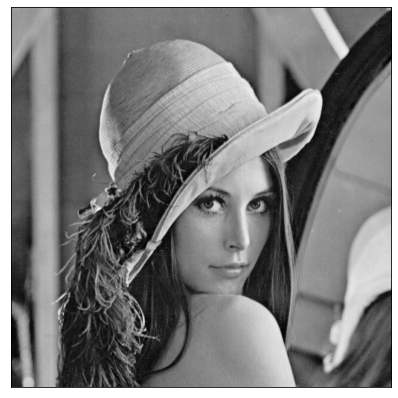

In [23]:
showImage(img)

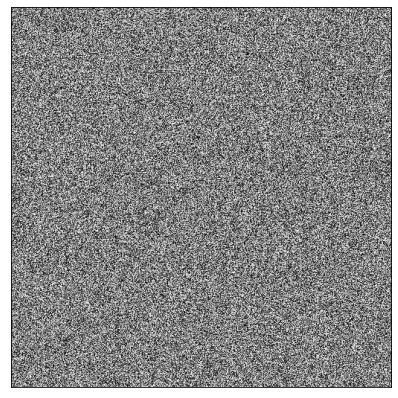

In [24]:
showImage(eImg)

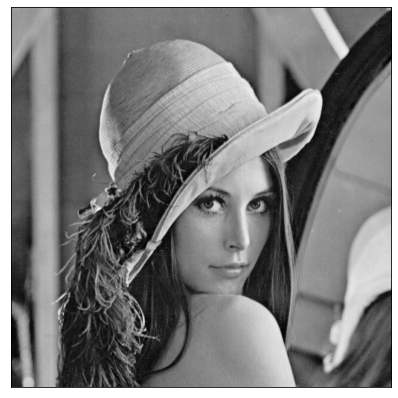

In [25]:
showImage(dImg)